<a href="https://colab.research.google.com/github/SmayanKulkarni/AI-and-ML-Course/blob/master/Exp0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/SDS/online_retail_II.xlsx")

In [ ]:
df.head()
#first 5 rows of dataset

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
df.describe()
#numerical information abt dataset

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [ ]:
df.info()
#information abt dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [ ]:
df.tail()
#last 5 rows of dataset

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


In [ ]:
null_values = df.isnull().sum()
print(null_values)

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64


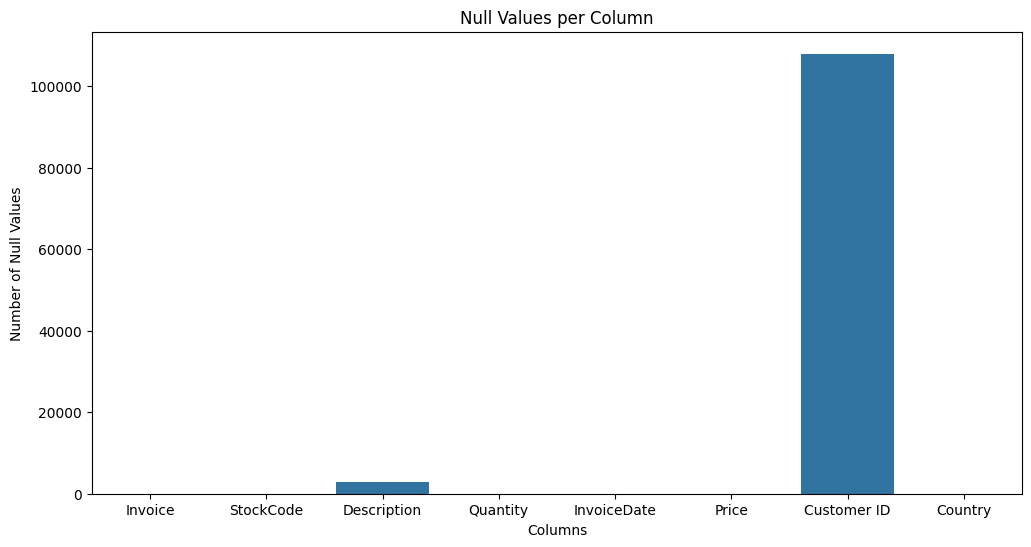

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=null_values.index, y=null_values.values)
#.index for column name, .values for no. of null values
plt.xlabel("Columns")
plt.ylabel("Number of Null Values")
plt.title("Null Values per Column")
plt.show()


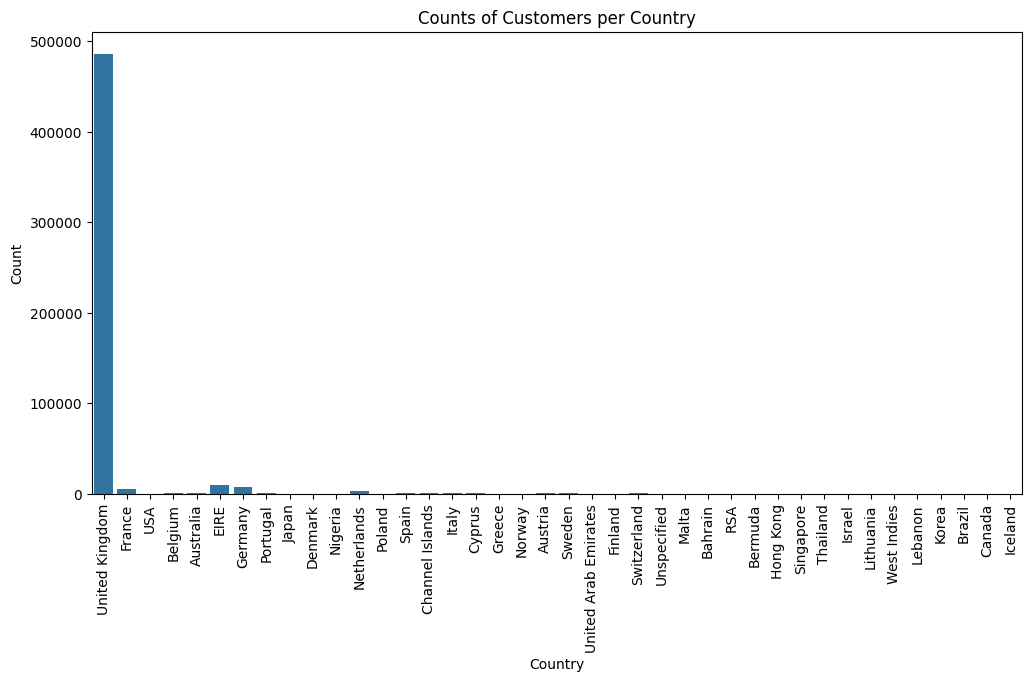

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Country', data=df)
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Counts of Customers per Country")
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.show()


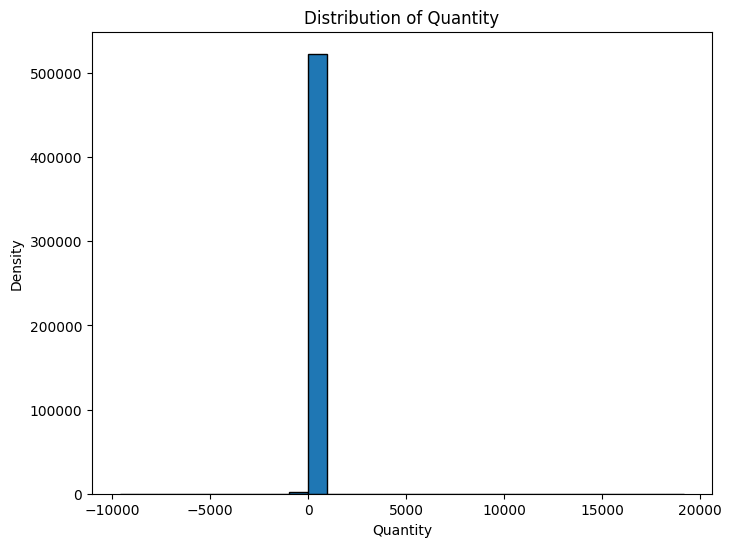

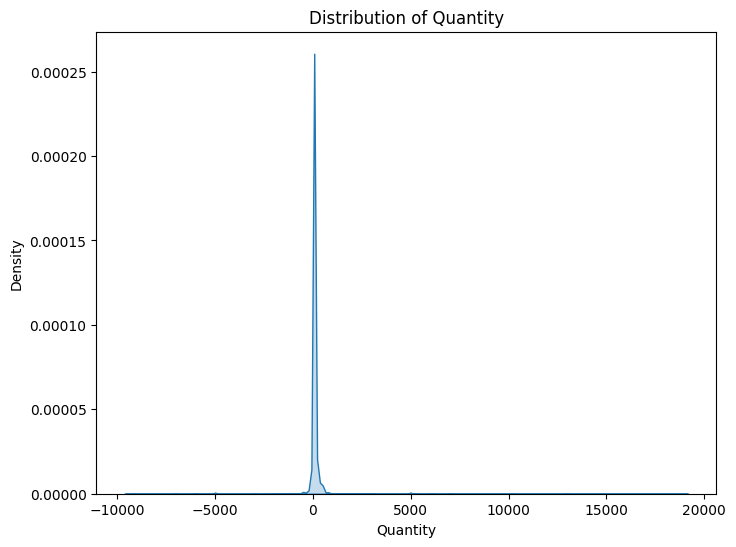

In [ ]:
# histogram for 'Quantity'
plt.figure(figsize=(8, 6))
plt.hist(df['Quantity'], bins=30, edgecolor='black')  # Adjust 'bins' as needed
plt.xlabel('Quantity')
plt.ylabel('Density')
plt.title('Distribution of Quantity')
plt.show()
#  density plot for 'Quantity'
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Quantity'], fill=True)  # Use kdeplot for a smoother density plot
plt.xlabel('Quantity')
plt.ylabel('Density')
plt.title('Distribution of Quantity')
plt.show()


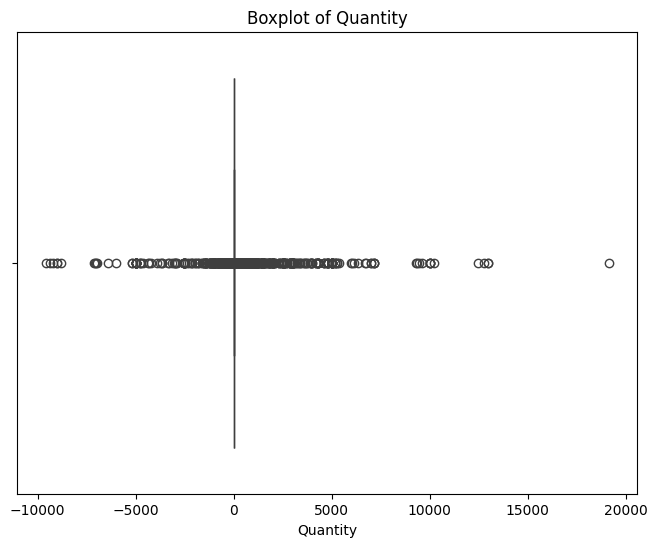

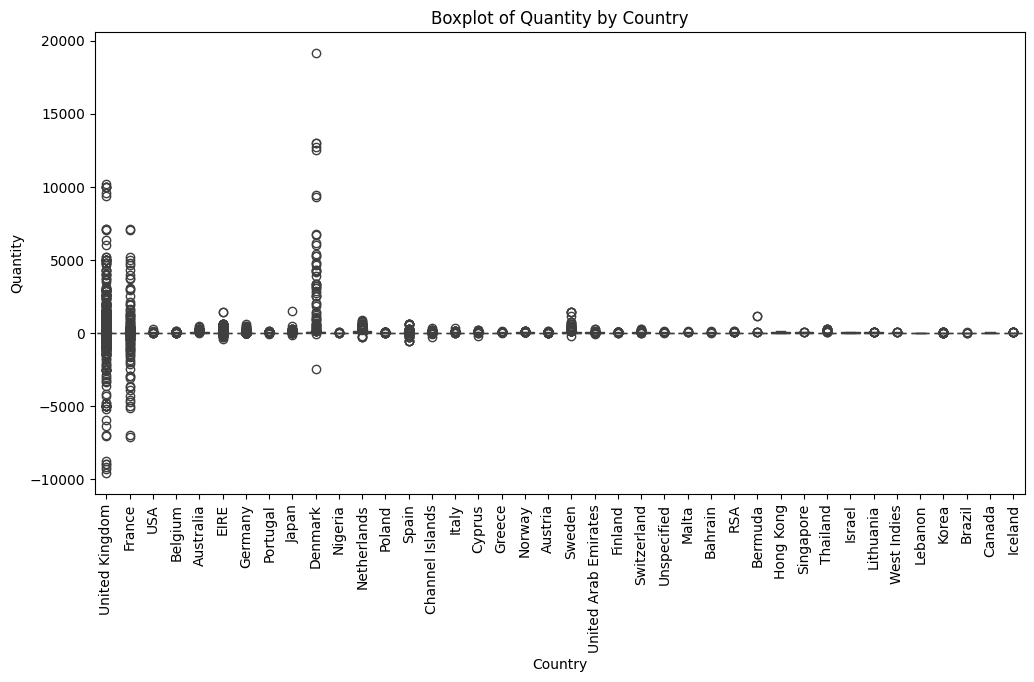

In [ ]:
# prompt: Plot Boxplots- for visualizing the distribution of data in terms of quartiles. To identify outliers and compare distributions across different groups.

# Boxplot for 'Quantity'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Quantity'])
plt.xlabel('Quantity')
plt.title('Boxplot of Quantity')
plt.show()

# Boxplot for 'Quantity' grouped by 'Country' (example)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Quantity', data=df)
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.title('Boxplot of Quantity by Country')
plt.xticks(rotation=90)
plt.show()


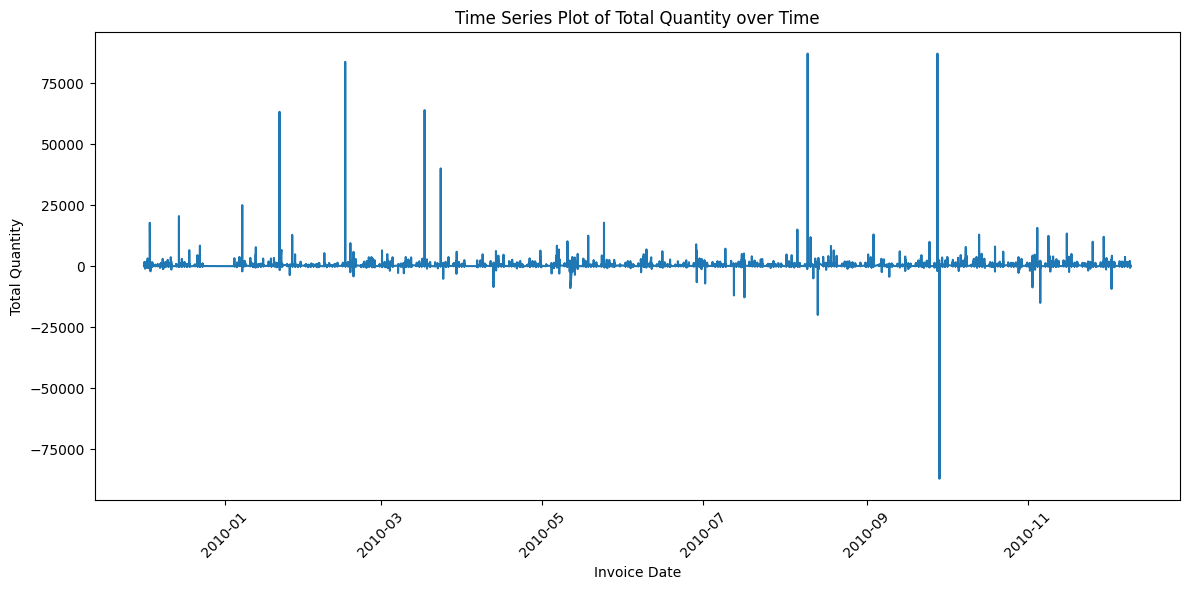

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
time_series_data = df.groupby('InvoiceDate')['Quantity'].sum()

plt.figure(figsize=(12, 6))
plt.plot(time_series_data.index, time_series_data.values)
plt.xlabel('Invoice Date')
plt.ylabel('Total Quantity')
plt.title('Time Series Plot of Total Quantity over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


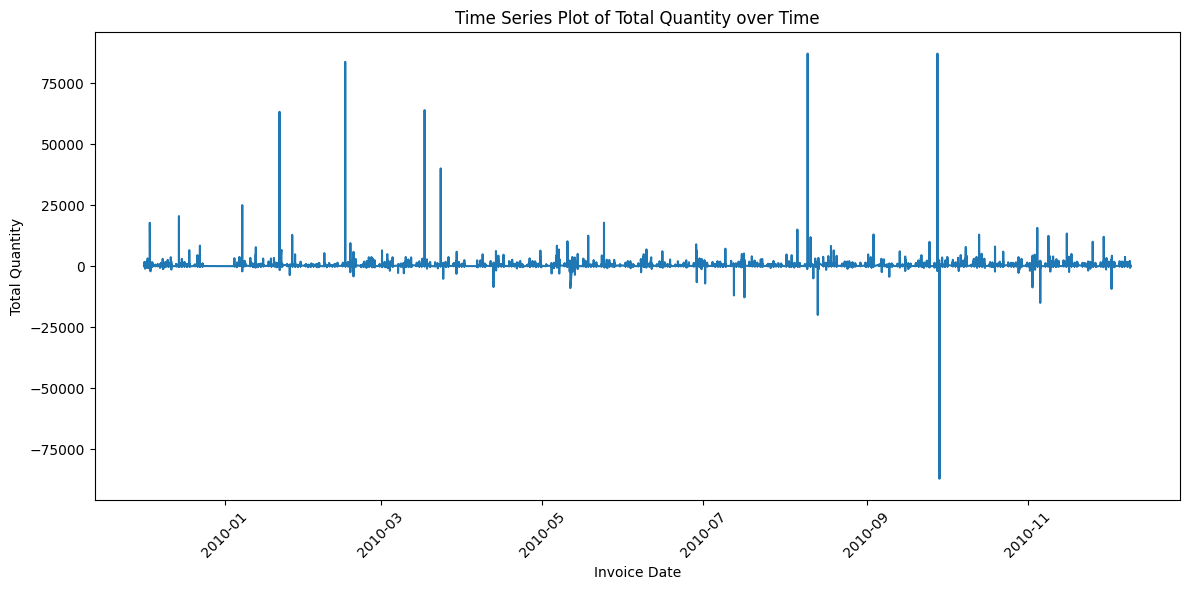

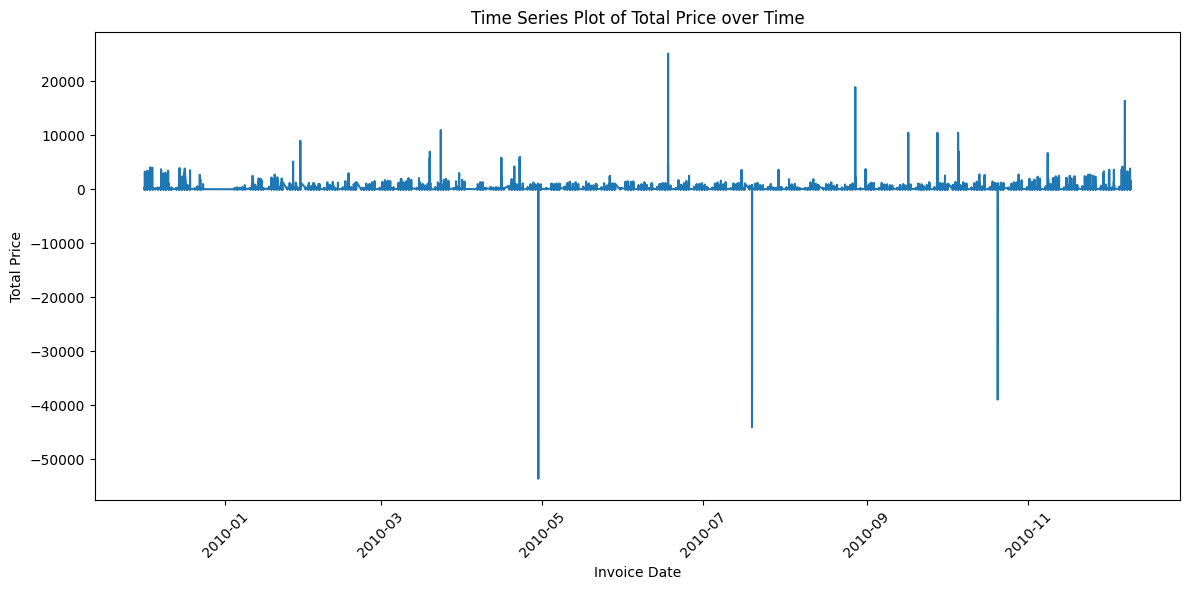

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

time_series_quantity = df.groupby('InvoiceDate')['Quantity'].sum()
plt.figure(figsize=(12, 6))
plt.plot(time_series_quantity.index, time_series_quantity.values)
plt.xlabel('Invoice Date')
plt.ylabel('Total Quantity')
plt.title('Time Series Plot of Total Quantity over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

if 'Price' in df.columns and pd.api.types.is_numeric_dtype(df['Price']):
    time_series_price = df.groupby('InvoiceDate')['Price'].sum()
    plt.figure(figsize=(12, 6))
    plt.plot(time_series_price.index, time_series_price.values)
    plt.xlabel('Invoice Date')
    plt.ylabel('Total Price')
    plt.title('Time Series Plot of Total Price over Time')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("'Price' column not found or not numeric. Cannot create the time series plot.")
